In [1]:
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
os.getcwd()

'/home/zhk/project/vae/vae/notebooks'

In [71]:
dir = "../input/carla/clear_weather_data/Town05_long/routes_town05_10_16_15_15_11"
png_name = '0588.png'
npy_name = '0588.npy'
sample_front_img_path = os.path.join(dir, 'rgb_front', png_name)
sample_left_img_path = os.path.join(dir, 'rgb_left', png_name)
sample_right_img_path = os.path.join(dir, 'rgb_right', png_name)
sample_rear_img_path = os.path.join(dir, 'rgb_rear', png_name)


sample_seg_front_path = os.path.join(dir, 'seg_front', png_name)
sample_seg_left_path = os.path.join(dir, 'seg_left', png_name)
sample_seg_right_path = os.path.join(dir, 'seg_right', png_name)
sample_seg_rear_path = os.path.join(dir, 'seg_rear', png_name)
sample_seg_topdown_path = os.path.join(dir, 'topdown', png_name)

sample_lidar = os.path.join(dir,'lidar', npy_name)

In [35]:
def scale_and_crop_seg(seg, scale=1, crop=[256,256], shift_x=0, shift_y=0):
    """
    Scale and crop a PIL image, returning a channels-first numpy array.
    """
    # image = Image.open(filename)
    (width, height) = (int(seg.width // scale), int(seg.height // scale))
    seg_resized = seg.resize((width, height))
    seg = np.asarray(seg_resized)
    start_x = height//2 - crop[0]//2 + shift_x
    start_y = width//2 - crop[1]//2 + shift_y
    cropped_seg = seg[start_x:start_x+crop[0], start_y:start_y+crop[1]]
    cropped_seg = cropped_seg
    return cropped_seg

In [36]:
def scale_and_crop_image(image, scale=1, crop=[256,256], shift_x = 0, shift_y=0):
    """
    Scale and crop a PIL image, returning a channels-first numpy array.
    """
    # image = Image.open(filename)
    (width, height) = (int(image.width // scale), int(image.height // scale))
    im_resized = image.resize((width, height))
    image = np.asarray(im_resized)
    start_x = height//2 - crop[0]//2 + shift_x
    start_y = width//2 - crop[1]//2 + shift_y
    cropped_image = image[start_x:start_x+crop[0], start_y:start_y+crop[1]]
    cropped_image = cropped_image
    return cropped_image

In [75]:
red = np.array([205, 159, 191],dtype=np.uint8) # 
purple = np.array([205, 175, 225], dtype=np.uint8) # statics
blue = np.array([122, 159, 191], dtype = np.uint8) # road
lightblue = np.array([141, 236, 240], dtype = np.uint8) # object
white = np.array([255,255,255],dtype=np.uint8) # void
orange = np.array([228, 147, 24], dtype=np.uint8) # roadlines
ids = {'None':0, 'Buildings':1, 'Fences':2, 'Other':3, 'Pedestrians':4, 'Pole':5, 'RoadLines':6, 'Roads':7, 'Sidewalks':8, 'Vegetation':9, 'Vehicles':10, 'Walls':11, 'TrafficSigns':12, 'Sky':13, 'Ground': 14, 'Bridge': 15, 'RailTrack': 16, 'GuardRail':17, 'TrafficLight':18, 'Static':19, 'Dynamic':20, 'Water':21, 'Terrain':22}
id_obstacle = [1,2,5,8,9,11,12,14,15,16,17,18,19,20,21,22]
id_object = [4, 10]
id_road = [0,3,6,7,27]
id_traffic_light = [23]

In [38]:
def paint_lfr(seg):
    (w,h) = seg.shape
    image = np.zeros([w,h,3], dtype=np.uint8)
    image[np.isin(seg, id_obstacle)] = purple
    image[np.isin(seg, id_object)] = lightblue
    image[np.isin(seg,id_road)] = blue
    return image

In [39]:
def paint(seg):
    (w,h) = seg.shape
    image = np.zeros([w,h,3], dtype=np.uint8)
    image[np.isin(seg, id_obstacle)] = purple
    image[np.isin(seg, id_object)] = lightblue
    image[np.isin(seg,id_road)] = blue
    return image

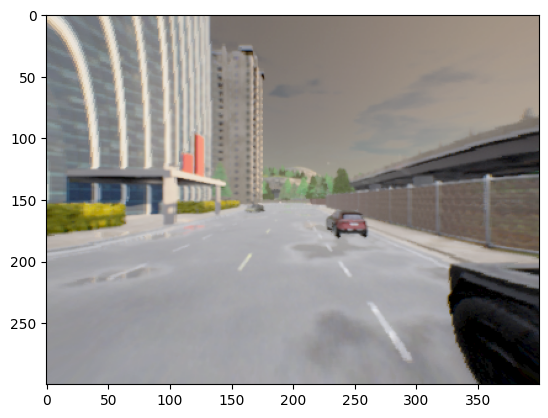

In [76]:
scale = 1
sample_front_img = scale_and_crop_image(Image.open(sample_front_img_path), scale=scale, crop=[300, 400])
plt.imshow(sample_front_img)
plt.show()

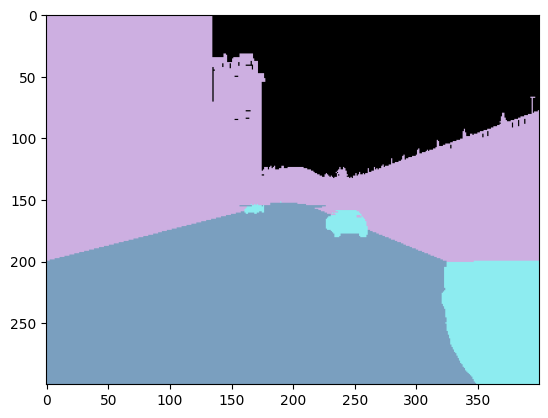

In [77]:
scale = 1
input_resolution = 256
sample_front_seg = scale_and_crop_seg(Image.open(sample_seg_front_path), scale=scale, crop=[300, 400])
sample_img_seg = paint_lfr(np.array(sample_front_seg))
plt.imshow(sample_img_seg)
plt.show()

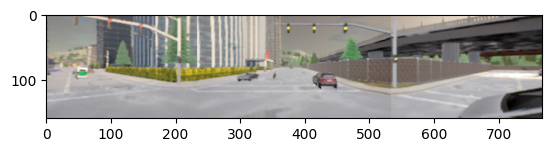

In [42]:
scale = 1
input_resolution = 256
sample_left_img = scale_and_crop_image(Image.open(sample_left_img_path), scale=0.8, crop=[160,234], shift_x=0, shift_y=-47)
sample_front_img = scale_and_crop_image(Image.open(sample_front_img_path), scale=scale, crop=[160, 300])
sample_right_img = scale_and_crop_image(Image.open(sample_right_img_path), scale=0.8, crop=[160, 234], shift_x=0, shift_y=47)

sample_img = np.concatenate([sample_left_img, sample_front_img, sample_right_img], axis=1)

plt.imshow(sample_img)
plt.show()

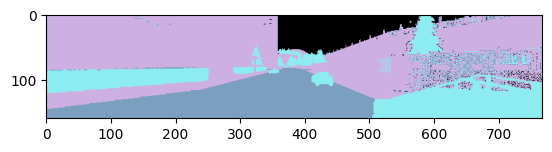

In [72]:
from matplotlib.pyplot import figure
scale = 1
input_resolution = 256
sample_left_seg = scale_and_crop_seg(Image.open(sample_seg_left_path), scale=0.8, crop=[160,234], shift_x=0, shift_y=-47)
sample_front_seg = scale_and_crop_seg(Image.open(sample_seg_front_path), scale=scale, crop=[160, 300])
sample_right_seg = scale_and_crop_seg(Image.open(sample_seg_right_path), scale=0.8, crop=[160, 234], shift_x=0, shift_y=47)

sample_img_seg = np.concatenate([sample_left_seg, sample_front_seg, sample_right_seg], axis=1)
sample_img_seg = paint_lfr(np.array(sample_img_seg))
plt.imshow(sample_img_seg)
plt.show()


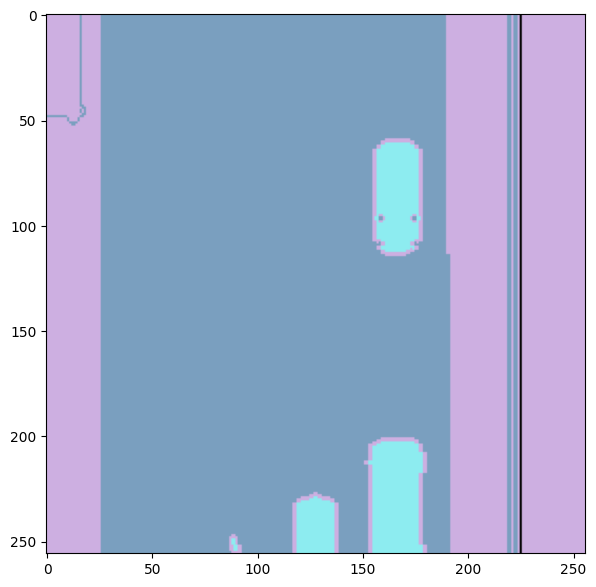

In [78]:
scale = 0.5
input_resolution = 256
img_original = Image.open(sample_seg_topdown_path)

sample_seg = scale_and_crop_seg(Image.open(sample_seg_topdown_path), scale=scale, shift_x=-128)
img = paint(np.array(sample_seg))
plt.figure(figsize = (7,7))
plt.imshow(img)
plt.show()

In [90]:

def lidar_to_histogram_features(lidar, crop=256):
    """
    Convert LiDAR point cloud into 2-bin histogram over 256x256 grid
    """
    def splat_points(point_cloud):
        # 256 x 256 grid
        pixels_per_meter = 8
        hist_max_per_pixel = 3
        x_meters_max = 8
        y_meters_max = 16
        xbins = np.linspace(-2*x_meters_max, 2*x_meters_max+1, 2*x_meters_max*pixels_per_meter+1)
        ybins = np.linspace(-y_meters_max, 0, y_meters_max*pixels_per_meter+1)
        hist = np.histogramdd(point_cloud[...,:2], bins=(xbins, ybins))[0]
        hist[hist>hist_max_per_pixel] = hist_max_per_pixel
        overhead_splat = hist/hist_max_per_pixel
        return overhead_splat
    print(np.mean(lidar[...,2]))
    l1 = lidar[lidar[...,2]<=-2.5]
    l2 = lidar[(-2.5 < lidar[...,2]) & (lidar[...,2]>= -2.4)]
    l3 = lidar[(-2.4 < lidar[...,2]) & (lidar[...,2]>= -2.3)]
    l4 = lidar[(-2.3 < lidar[...,2]) & (lidar[...,2]>= -2.2)]
    l5 = lidar[(-2.2 < lidar[...,2]) & (lidar[...,2]>= 0.0)]
    l6 = lidar[lidar[...,2]>0.0]

    features = np.stack([splat_points(l1), splat_points(l2), splat_points(l3), splat_points(l4), splat_points(l5), splat_points(l6)], axis=-1)
    features = np.flip(np.transpose(features, (2, 1, 0)), 2).astype(np.float32)
    return features

-0.9258208


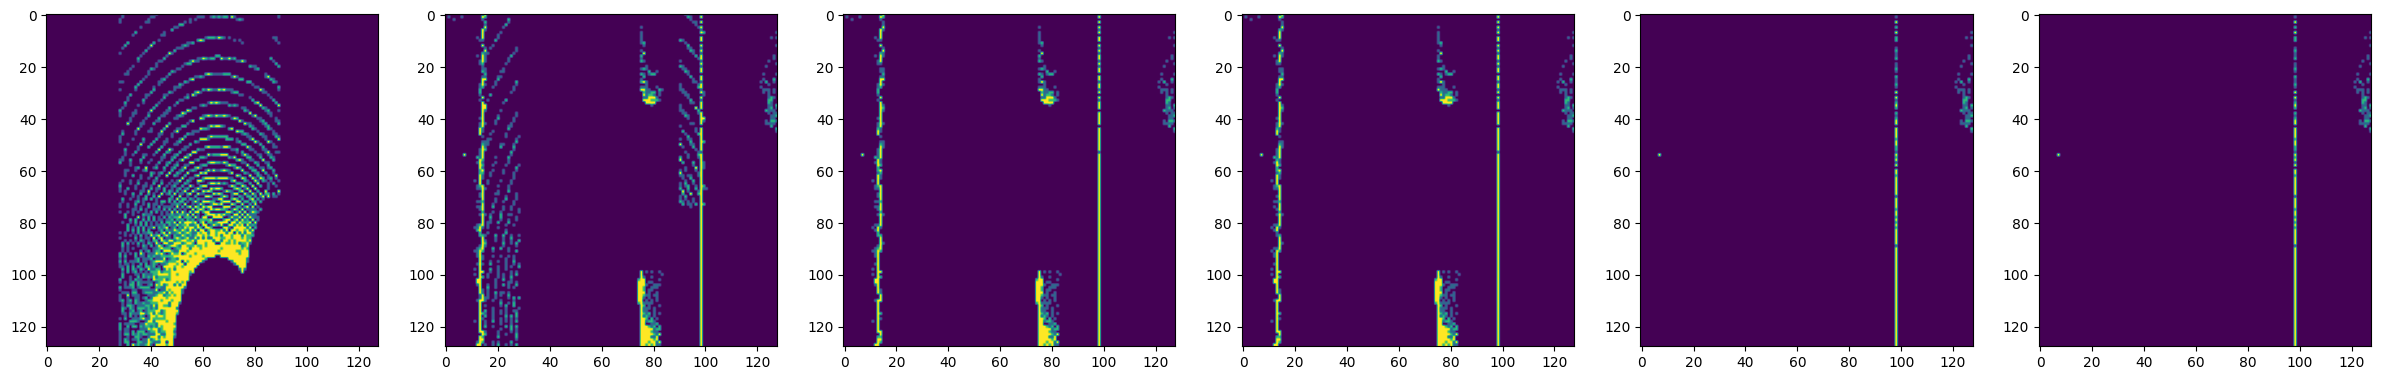

In [91]:
a = np.load(sample_lidar)
a[:,1] *= -1
features = lidar_to_histogram_features(a)
f, axarr = plt.subplots(1, 6, figsize=(30, 5))
axarr[0].imshow(features[0])
axarr[1].imshow(features[1])
axarr[2].imshow(features[2])
axarr[3].imshow(features[3])
axarr[4].imshow(features[4])
axarr[5].imshow(features[5])
plt.show()


-0.9258208


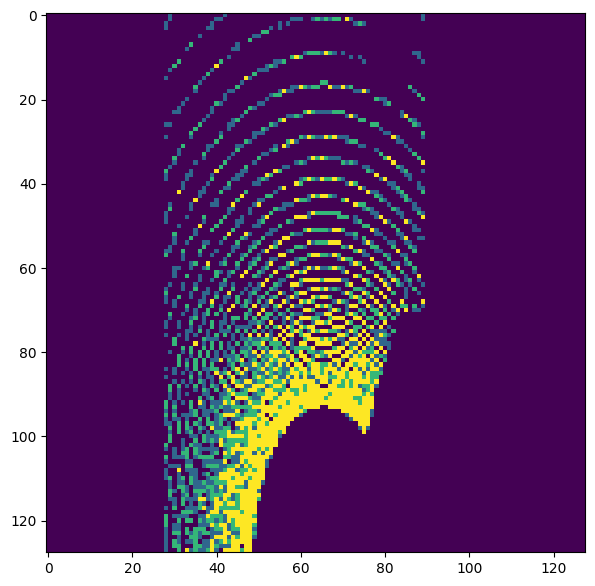

In [92]:
a = np.load(sample_lidar)
a[:,1] *= -1
features = lidar_to_histogram_features(a)
plt.figure(figsize = (7,7))
plt.imshow(features[0])
plt.show()
plt.show()

In [15]:
# npy to mesh
import numpy as np
a = np.array([1,2,3,2,3,1,0,0,1])
b1=(a == 0).astype(float)
b2=np.isin(a, [1,2]).astype(float)
b3=(a == 3).astype(float)
print(np.stack([b1,b2,b3], axis=0))
t = np.stack([(a == 0).astype(float), (np.isin(a, [1,2])).astype(float), (a == 3).astype(float)], axis=0)

[[0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [1. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0.]]


In [18]:
# test dataset
import torch
print(torch.cuda.get_device_name())
print(torch.__version__)
print(torch.version.cuda)
x = torch.randn(1).cuda()
print(x)

Quadro RTX 6000
1.11.0+cu113
11.3
tensor([0.9744], device='cuda:0')
